In [1]:
#Loading library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
warnings.filterwarnings('ignore')



In [2]:

# Reading the dataset

youtube = pd.read_csv('Canada.csv') 
youtube

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [3]:
# Shape of Data Frame (Rows and Columns)

youtube.shape

(40881, 16)

In [4]:
# Dropping nan values 

youtube = youtube.dropna(how='any',axis=0)

In [5]:
# no missing values

youtube.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [6]:
# Statistics metrics

youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [7]:
# Data info

youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                39585 non-null  object
 1   trending_date           39585 non-null  object
 2   title                   39585 non-null  object
 3   channel_title           39585 non-null  object
 4   category_id             39585 non-null  int64 
 5   publish_time            39585 non-null  object
 6   tags                    39585 non-null  object
 7   views                   39585 non-null  int64 
 8   likes                   39585 non-null  int64 
 9   dislikes                39585 non-null  int64 
 10  comment_count           39585 non-null  int64 
 11  thumbnail_link          39585 non-null  object
 12  comments_disabled       39585 non-null  bool  
 13  ratings_disabled        39585 non-null  bool  
 14  video_error_or_removed  39585 non-null  bool  
 15  de

In [8]:
# Category might be a important feature

youtube['category_id'].value_counts()

24    13173
25     3868
22     3726
23     3725
10     3695
17     2650
1      2001
26     1998
20     1330
28     1143
27      982
19      377
15      369
2       348
43      124
29       70
30        6
Name: category_id, dtype: int64

In [9]:
youtube.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

# Feature Engineering

In [10]:
# Replacing the string in the publish time for nothing

# Replacing the T for nothing
youtube['publish_time'] = youtube['publish_time'].str.replace('T',' ')

# Replacing Z for nothing
youtube['publish_time'] = youtube['publish_time'].str.replace('Z',' ')

# Replacing Z for nothing
youtube['publish_time'] = youtube['publish_time'].str.replace('.000','')
youtube

youtube


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [11]:
# Splitting date and time for a better analysis

youtube['pub_date'], youtube['pub_time'] = youtube['publish_time'].str.split(' ', 1).str
youtube

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,pub_date,pub_time
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-10,17:00:03
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,2017-11-13,17:00:00
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,11:04:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,2018-06-13,18:00:07
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False,► Retrouvez vos programmes préférés : https://...,2018-06-13,19:01:18
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False,Find out more about Kingdom Hearts 3: https://...,2018-06-11,17:30:53
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,2018-06-13,04:00:05


In [12]:
# Creating another columns containing the days of the week from 0 to 6

youtube['weekday'] = pd.to_datetime(youtube['pub_date']).apply(lambda x: x.weekday())
youtube['weekday']

0        4
1        0
2        6
3        6
4        3
        ..
40876    2
40877    2
40878    0
40879    2
40880    2
Name: weekday, Length: 39585, dtype: int64

In [13]:
# Converting date and time as datetime

youtube['pub_date'] = pd.to_datetime(youtube['pub_date'])
youtube['pub_time'] = pd.to_datetime(youtube['pub_time'])
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           39585 non-null  object        
 1   title                   39585 non-null  object        
 2   channel_title           39585 non-null  object        
 3   category_id             39585 non-null  int64         
 4   publish_time            39585 non-null  object        
 5   tags                    39585 non-null  object        
 6   views                   39585 non-null  int64         
 7   likes                   39585 non-null  int64         
 8   dislikes                39585 non-null  int64         
 9   comment_count           39585 non-null  int64         
 10  comments_disabled       39585 non-null  bool          
 11  ratings_disabled        39585 non-null  bool          
 12  video_error_or_removed  39585 non-null  bool  

In [14]:
# Divind the column publish date into three columns day, month and year

youtube['day'] = youtube['pub_date'].dt.day
youtube['month'] = youtube['pub_date'].dt.month
youtube['year'] = youtube['pub_date'].dt.year
youtube

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,pub_date,pub_time,weekday,day,month,year
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-10,2020-12-05 17:00:03,4,10,11,2017
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,2017-11-13,2020-12-05 17:00:00,0,13,11,2017
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,2020-12-05 19:05:24,6,12,11,2017
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,2017-11-12,2020-12-05 18:01:41,6,12,11,2017
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,2020-12-05 11:04:14,3,9,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,2018-06-13,2020-12-05 18:00:07,2,13,6,2018
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False,► Retrouvez vos programmes préférés : https://...,2018-06-13,2020-12-05 19:01:18,2,13,6,2018
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False,Find out more about Kingdom Hearts 3: https://...,2018-06-11,2020-12-05 17:30:53,0,11,6,2018
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,2018-06-13,2020-12-05 04:00:05,2,13,6,2018


In [15]:
# Splitting hour, minute and second from Time

youtube['hour'] = youtube['pub_time'].dt.hour
youtube['minute'] = youtube['pub_time'].dt.minute
youtube['second'] = youtube['pub_time'].dt.second
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           39585 non-null  object        
 1   title                   39585 non-null  object        
 2   channel_title           39585 non-null  object        
 3   category_id             39585 non-null  int64         
 4   publish_time            39585 non-null  object        
 5   tags                    39585 non-null  object        
 6   views                   39585 non-null  int64         
 7   likes                   39585 non-null  int64         
 8   dislikes                39585 non-null  int64         
 9   comment_count           39585 non-null  int64         
 10  comments_disabled       39585 non-null  bool          
 11  ratings_disabled        39585 non-null  bool          
 12  video_error_or_removed  39585 non-null  bool  

In [16]:
# Converting data type of the boolean values as int because we are going to consider False = 0 and True = 1

youtube['comments_disabled'] = youtube.comments_disabled.astype(int)
youtube['ratings_disabled'] = youtube.comments_disabled.astype(int)
youtube['video_error_or_removed'] = youtube.comments_disabled.astype(int)
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39585 entries, 0 to 40880
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           39585 non-null  object        
 1   title                   39585 non-null  object        
 2   channel_title           39585 non-null  object        
 3   category_id             39585 non-null  int64         
 4   publish_time            39585 non-null  object        
 5   tags                    39585 non-null  object        
 6   views                   39585 non-null  int64         
 7   likes                   39585 non-null  int64         
 8   dislikes                39585 non-null  int64         
 9   comment_count           39585 non-null  int64         
 10  comments_disabled       39585 non-null  int64         
 11  ratings_disabled        39585 non-null  int64         
 12  video_error_or_removed  39585 non-null  int64 

In [17]:
# Changing False = 0 and True = 1

youtube['comments_disabled'] = youtube['comments_disabled'].replace('False', 0)
youtube['comments_disabled'] = youtube['comments_disabled'].replace('True', 1)
youtube['ratings_disabled'] = youtube['ratings_disabled'].replace('False', 0)
youtube['ratings_disabled'] = youtube['ratings_disabled'].replace('True', 1)
youtube['video_error_or_removed'] = youtube['video_error_or_removed'].replace('False', 0)
youtube['video_error_or_removed'] = youtube['video_error_or_removed'].replace('True', 1)                                                                        
youtube


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,description,pub_date,pub_time,weekday,day,month,year,hour,minute,second
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,...,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-10,2020-12-05 17:00:03,4,10,11,2017,17,0,3
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,...,STill got a lot of packages. Probably will las...,2017-11-13,2020-12-05 17:00:00,0,13,11,2017,17,0,0
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,2020-12-05 19:05:24,6,12,11,2017,19,5,24
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,...,I know it's been a while since we did this sho...,2017-11-12,2020-12-05 18:01:41,6,12,11,2017,18,1,41
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,...,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,2020-12-05 11:04:14,3,9,11,2017,11,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,...,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,2018-06-13,2020-12-05 18:00:07,2,13,6,2018,18,0,7
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,...,► Retrouvez vos programmes préférés : https://...,2018-06-13,2020-12-05 19:01:18,2,13,6,2018,19,1,18
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,...,Find out more about Kingdom Hearts 3: https://...,2018-06-11,2020-12-05 17:30:53,0,11,6,2018,17,30,53
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,...,Peter Navarro isn’t talking so tough now. Ana ...,2018-06-13,2020-12-05 04:00:05,2,13,6,2018,4,0,5


In [18]:
# Now let's delete the unecessary columns

youtube.drop(columns=['title', 'trending_date', 'tags', 'description', 'channel_title', 'publish_time', 
                      'pub_time','pub_date', 'second', 'minute'], inplace= True)
youtube

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,weekday,day,month,year,hour
0,10,17158579,787425,43420,125882,0,0,0,4,10,11,2017,17
1,23,1014651,127794,1688,13030,0,0,0,0,13,11,2017,17
2,23,3191434,146035,5339,8181,0,0,0,6,12,11,2017,19
3,24,2095828,132239,1989,17518,0,0,0,6,12,11,2017,18
4,10,33523622,1634130,21082,85067,0,0,0,3,9,11,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,24,80685,1701,99,1312,0,0,0,2,13,6,2018,18
40877,24,103339,460,66,51,0,0,0,2,13,6,2018,19
40878,20,773347,25900,224,3881,0,0,0,0,11,6,2018,17
40879,25,115225,2115,182,1672,0,0,0,2,13,6,2018,4


# Initial Data Exploration

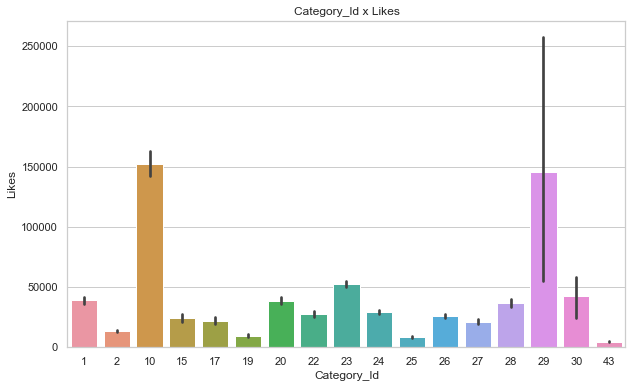

In [19]:
# Category Id x likes
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category_id", y="likes", data=youtube)
plt.title('Category_Id x Likes')
plt.ylabel('Likes')
plt.xlabel('Category_Id')
plt.show()

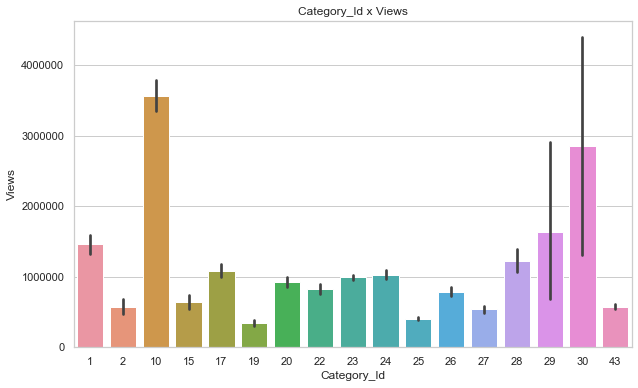

In [20]:
# Category Id x likes
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category_id", y="views", data=youtube)
plt.title('Category_Id x Views')
plt.ylabel('Views')
plt.xlabel('Category_Id')
plt.show()

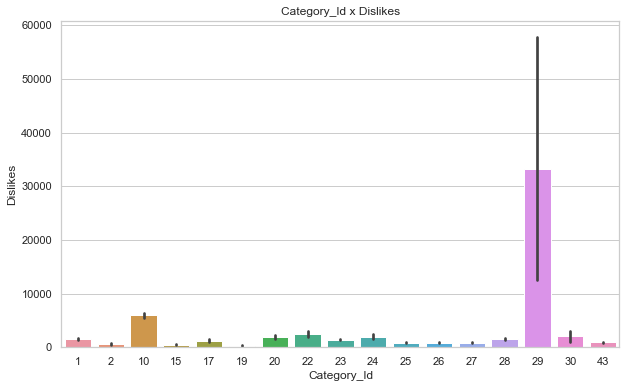

In [21]:
# Category Id x Dislikes
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category_id", y="dislikes", data=youtube)
plt.title('Category_Id x Dislikes')
plt.ylabel('Dislikes')
plt.xlabel('Category_Id')
plt.show()

We can maybe say that the mostly of categories that get more likes there's a high probability the get dislikes as well

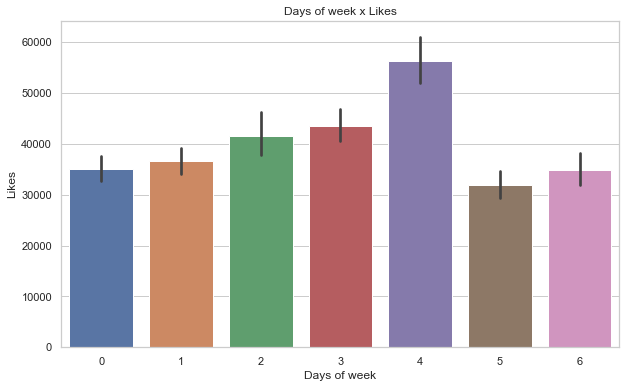

In [22]:
# Likes x Days of the week
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="weekday", y="likes", data=youtube)
plt.title('Days of week x Likes')
plt.ylabel('Likes')
plt.xlabel('Days of week')
plt.show()

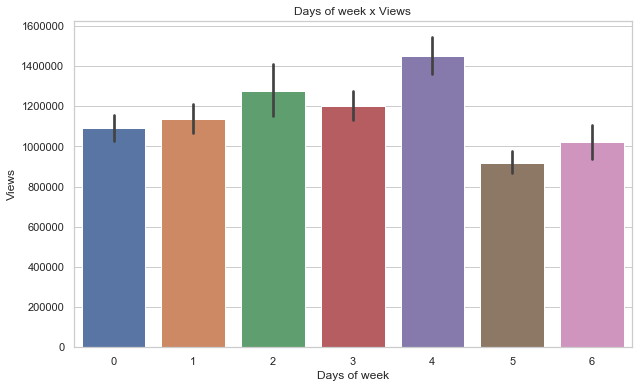

In [23]:
# Views x Days of the week
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="weekday", y="views", data=youtube)
plt.title('Days of week x Views')
plt.ylabel('Views')
plt.xlabel('Days of week')
plt.show()

Here we can say that the best day of the week to get more likes seems to be Friday

In [24]:
# Ratio likes per views

youtube['ratio_likes'] = youtube['likes']/ youtube['views']
youtube['ratio_likes']


0        0.045891
1        0.125949
2        0.045758
3        0.063096
4        0.048746
           ...   
40876    0.021082
40877    0.004451
40878    0.033491
40879    0.018355
40880    0.002794
Name: ratio_likes, Length: 39585, dtype: float64

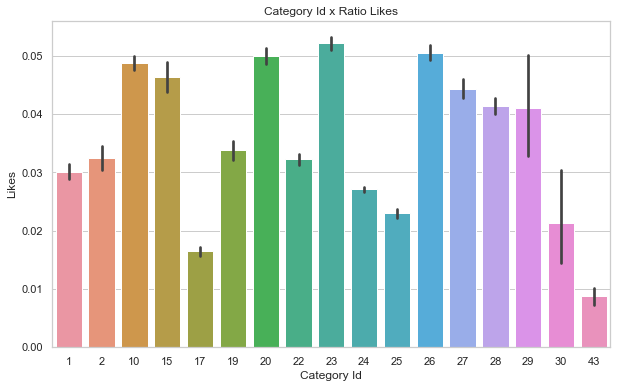

In [25]:
# Category Id x Ratio Likes
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category_id", y="ratio_likes", data=youtube)
plt.title('Category Id x Ratio Likes')
plt.ylabel('Likes')
plt.xlabel('Category Id')
plt.show()

In [26]:
# Ratio dislikes per views

youtube['ratio_dislikes'] = youtube['dislikes']/ youtube['views']
youtube['ratio_dislikes']


0        0.002531
1        0.001664
2        0.001673
3        0.000949
4        0.000629
           ...   
40876    0.001227
40877    0.000639
40878    0.000290
40879    0.001580
40880    0.000577
Name: ratio_dislikes, Length: 39585, dtype: float64

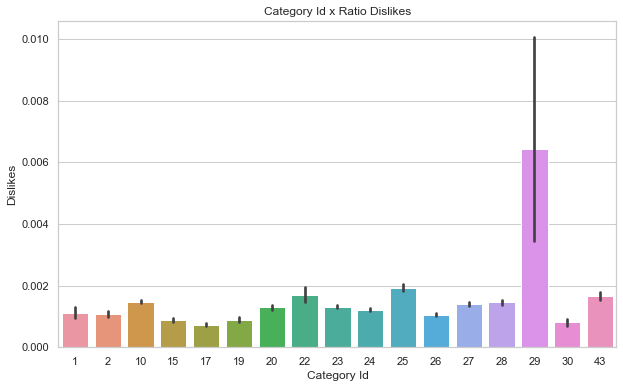

In [27]:
# Category Id x Ratio Dislikes
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category_id", y="ratio_dislikes", data=youtube)
plt.title('Category Id x Ratio Dislikes')
plt.ylabel('Dislikes')
plt.xlabel('Category Id')
plt.show()

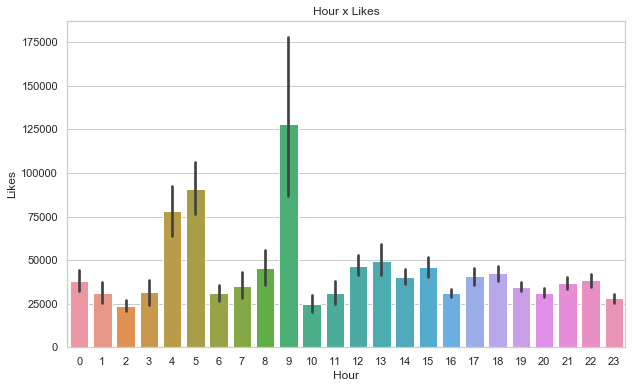

In [28]:
# Likes x Hour
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="hour", y="likes", data=youtube)
plt.title('Hour x Likes')
plt.ylabel('Likes')
plt.xlabel('Hour')
plt.show()

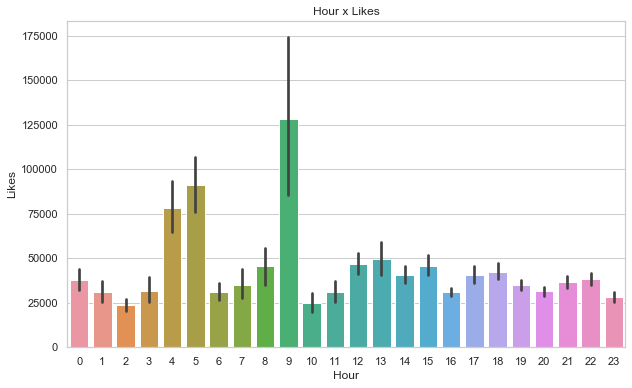

In [29]:
# Hour x View
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="hour", y="likes", data=youtube)
plt.title('Hour x Likes')
plt.ylabel('Likes')
plt.xlabel('Hour')
plt.show()

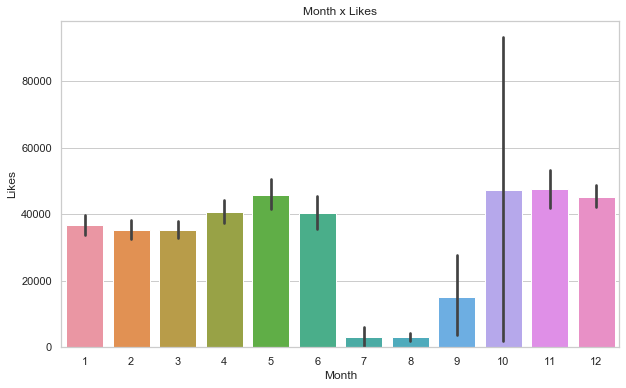

In [30]:
# Category Likes x Month
# So here there's an important thing Category_Id = 29 has the most likes but in the other hand the the most dislikes

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="month", y="likes", data=youtube)
plt.title('Month x Likes')
plt.ylabel('Likes')
plt.xlabel('Month')
plt.show()

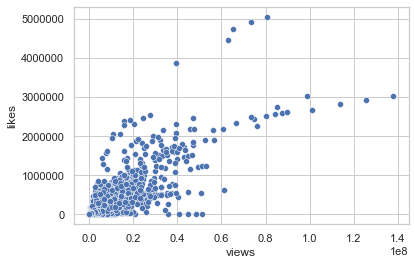

In [31]:
# Views x Likes

sns.scatterplot(data=youtube, x="views", y="likes")

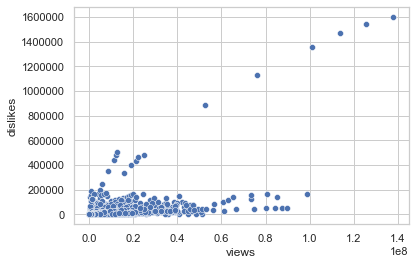

In [32]:
# Views x Dislikes

sns.scatterplot(data=youtube, x="views", y="dislikes")

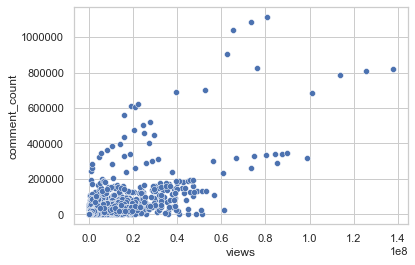

In [33]:
# Views x Comment cout

sns.scatterplot(data=youtube, x="views", y="comment_count")

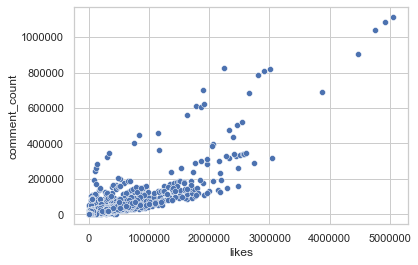

In [34]:
# Comment Count x Likes

sns.scatterplot(data=youtube, x="likes", y="comment_count")

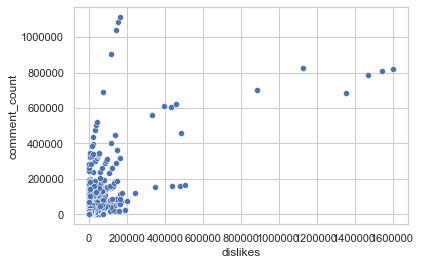

In [35]:
# Comment Count x Disikes

sns.scatterplot(data=youtube, x="dislikes", y="comment_count")

Text(0.5, 0.98, 'Distribution of likes')

<Figure size 432x288 with 0 Axes>

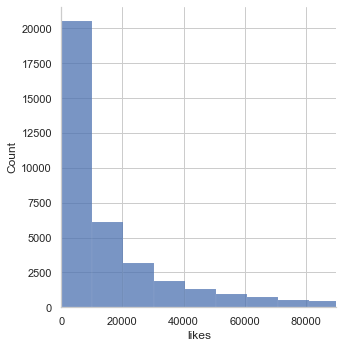

In [36]:
# Distribution of likes

fig=plt.figure(figsize=(6,4))
sns.set_style("whitegrid") 
l =  sns.displot((youtube['likes']),bins=500)
l.set(xlim=(0, 90000))
#Plot Label
fig.suptitle('Distribution of likes', fontsize = 20)

Text(0.5, 0.98, 'Distribution of Dislikes')

<Figure size 432x288 with 0 Axes>

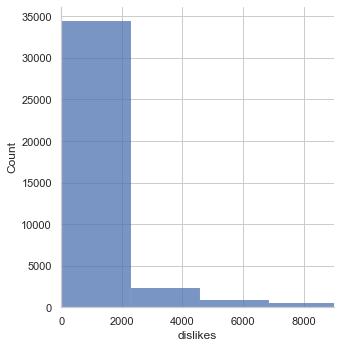

In [37]:
# Distribution of Dislikes

fig=plt.figure(figsize=(6,4))
sns.set_style("whitegrid") 
l =  sns.displot((youtube['dislikes']),bins=700)
l.set(xlim=(0, 9000))
#Plot Label
fig.suptitle('Distribution of Dislikes', fontsize = 20)

Text(0.5, 0.98, 'Distribution of Views')

<Figure size 432x288 with 0 Axes>

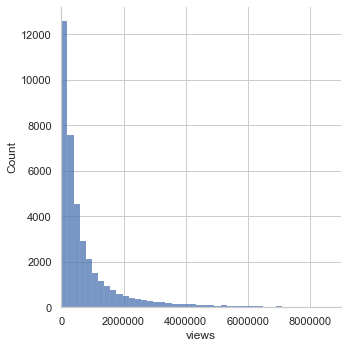

In [38]:
# Distribution of Views

fig=plt.figure(figsize=(6,4))
sns.set_style("whitegrid") 
l =  sns.displot((youtube['views']),bins=700)
l.set(xlim=(0, 9000000))
#Plot Label
fig.suptitle('Distribution of Views', fontsize = 20)

In [39]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,weekday,day,month,year,hour,ratio_likes,ratio_dislikes
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03,0.014197,0.014197,0.014197,2.970393,15.761450,5.282506,2017.752255,13.823671,0.034031,0.001333
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04,0.118305,0.118305,0.118305,1.967548,8.803802,3.854885,0.460477,6.700338,0.030869,0.003252
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02,0.000000,0.000000,0.000000,1.000000,8.000000,2.000000,2018.000000,10.000000,0.009801,0.000504
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03,0.000000,0.000000,0.000000,3.000000,16.000000,4.000000,2018.000000,16.000000,0.026041,0.000809
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03,0.000000,0.000000,0.000000,5.000000,23.000000,6.000000,2018.000000,19.000000,0.048911,0.001362
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,1.000000,1.000000,1.000000,6.000000,31.000000,12.000000,2018.000000,23.000000,0.450509,0.215580


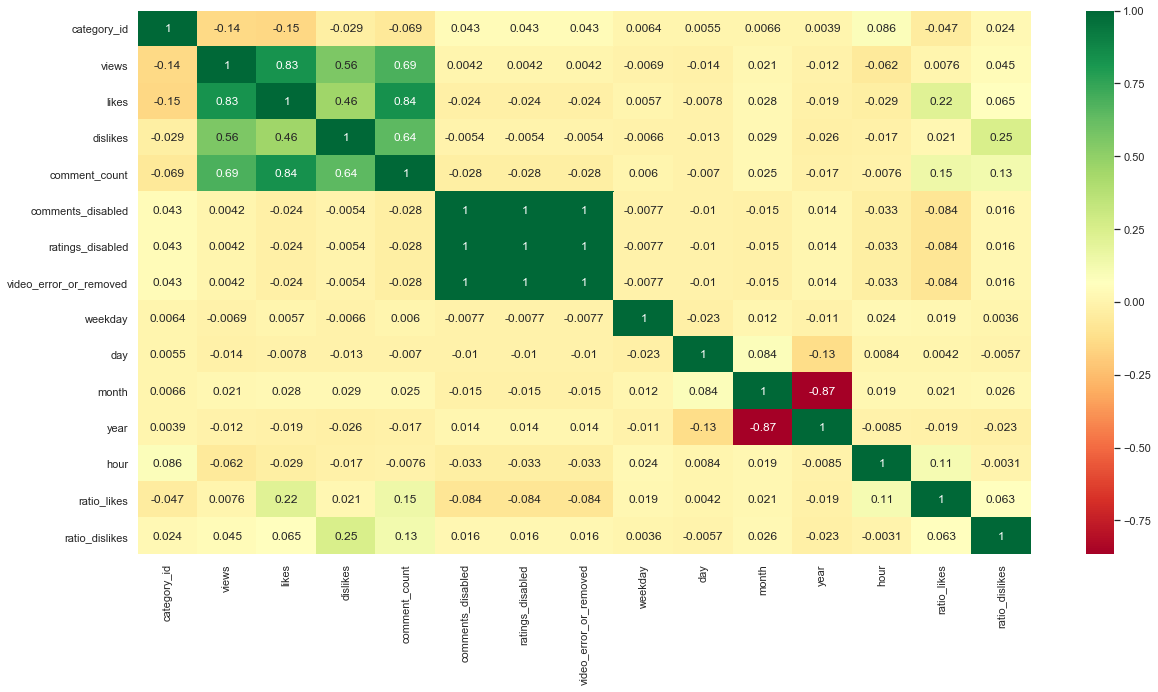

In [40]:
# Correlation heatmap. This is a nicer representation of the above correlation table
plt.figure(figsize=(20,10))
corrmat=youtube.corr() 
top_corr_features=corrmat.index 

#plot heat map 
g=sns.heatmap(youtube[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Maybe don't need these columns there's multicollinearity 

youtube.drop(columns=['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                      'month', 'year', 'ratio_dislikes', 'ratio_likes'])

# Modeling and Evaluating

- Predicting likes

In [41]:
# Importing models 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score


In [42]:
# Defining X and y

y=youtube['likes']
X=youtube.drop(['likes'],axis=1,inplace=False)

# 30% slipt

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state = 4242)

In [44]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(27709, 14) (11876, 14) (27709,) (11876,)


### Linear Regression

In [45]:
# Calling the model
lm = LinearRegression()

# Fitting 
lm.fit(X_train, y_train)

# Score
lm.score(X_test,y_test)

0.8594119388138729

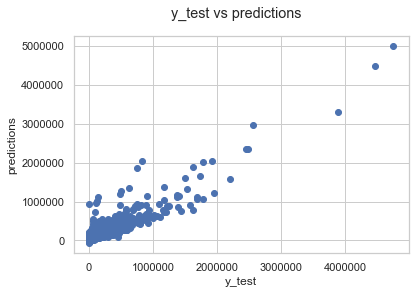

In [46]:

# Predictions
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions)

In [47]:
# Printing coeffs and intercept

print("lr.coef_: {}".format(lm.coef_))
print("lr.intercept_: {}".format(lm.intercept_))

lr.coef_: [-5.96513908e+02  2.13515888e-02 -1.65535651e+00  3.66734829e+00
  2.37950197e+02  2.37950197e+02  2.37950197e+02  2.40849577e+02
  3.85975608e+00  1.30344355e+02 -1.41145018e+01 -1.43414733e+02
  5.51212407e+05  5.76153602e+05]
lr.intercept_: 22113.883738713106


In [48]:
# R2 scores - train and test

print("Training set score: {:.2f}".format(lm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lm.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.86


### Ridge Regression

In [49]:
# alpha default value = 1


ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.86


In [50]:
# alpha = 0.001
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge0001.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.86


In [51]:
# alpha = 0.0001
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge00001.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.86


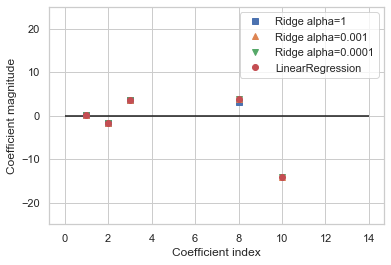

In [52]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge0001.coef_, '^', label="Ridge alpha=0.001")
plt.plot(ridge00001.coef_, 'v', label="Ridge alpha=0.0001")
plt.plot(lm.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lm.coef_))
plt.ylim(-25, 25)
plt.legend()

### Lasso Regression

In [53]:
# Lasso alpha = 1
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.86


In [54]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
# alpha = 0.1

lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.86


In [55]:
# alpha = 0.001

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.86


In [56]:
# alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.86


Text(0, 0.5, 'Coefficient magnitude')

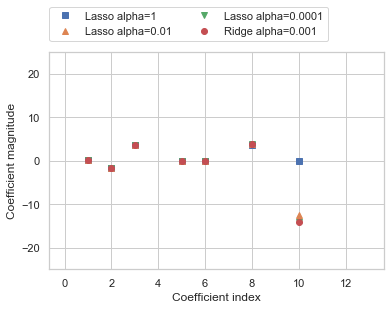

In [57]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lasso00001.coef_, 'o', label="Ridge alpha=0.001")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# 20% slipt

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,shuffle=False)

In [59]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31668, 14) (7917, 14) (31668,) (7917,)


### Linear Regression

In [60]:
# Calling the model
lm = LinearRegression()

# Fitting 
lm.fit(X_train, y_train)

# Score
lm.score(X_test,y_test)

0.902580615296651

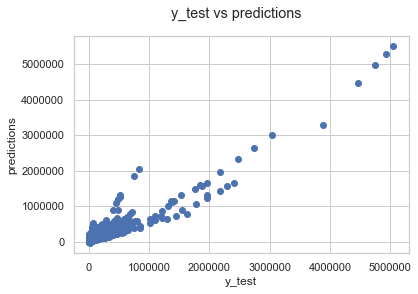

In [61]:
# Predictions

predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions)

In [62]:
# Printing coeffs and intercept

print("lr.coef_: {}".format(lm.coef_))
print("lr.intercept_: {}".format(lm.intercept_))

lr.coef_: [-5.93557125e+02  2.11737507e-02 -1.59930912e+00  3.63550803e+00
 -6.20505206e+02 -6.20505206e+02 -6.20505206e+02  2.78943284e+02
 -3.48951281e+00  2.75764876e+02  5.98377216e+02 -1.29295099e+02
  5.10029224e+05  7.66092160e+05]
lr.intercept_: -1213353.3261309597


In [63]:
# Train and test scores

print("Training set score: {:.2f}".format(lm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lm.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.90


### Ridge Regression

In [64]:
# alpha default value = 1


ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.90


In [65]:
# alpha = 0.001
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge0001.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.90


In [66]:
# alpha = 0.0001
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge00001.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.90


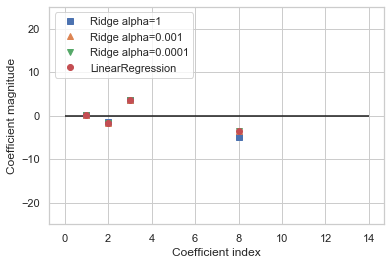

In [67]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge0001.coef_, '^', label="Ridge alpha=0.001")
plt.plot(ridge00001.coef_, 'v', label="Ridge alpha=0.0001")
plt.plot(lm.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lm.coef_))
plt.ylim(-25, 25)
plt.legend()

### Lasso Regression

In [68]:

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))


Training set score: 0.85
Test set score: 0.90


In [69]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
# alpha = 1

lasso1 = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso1.score(X_test, y_test)))


Training set score: 0.85
Test set score: 0.90


In [70]:
# alpha = 0.01

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))


Training set score: 0.85
Test set score: 0.90


In [71]:
# alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))


Training set score: 0.85
Test set score: 0.90


Text(0, 0.5, 'Coefficient magnitude')

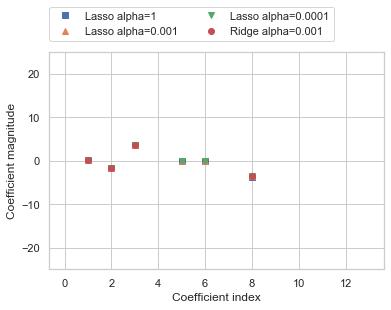

In [72]:
plt.plot(lasso1.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso0001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge0001.coef_, 'o', label="Ridge alpha=0.001")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# 10% slipt

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1,shuffle=False)

In [74]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(35626, 14) (3959, 14) (35626,) (3959,)


### Linear Regression

In [75]:
# Calling the model
lm = LinearRegression()

# Fitting 
lm.fit(X_train, y_train)

# Score
lm.score(X_test,y_test)

0.8441012162797495

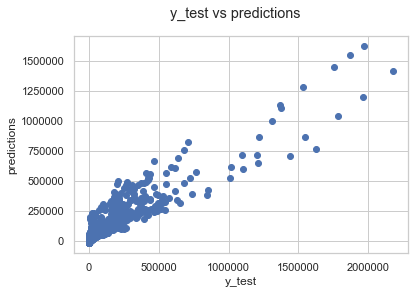

In [76]:
# Predictions

predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions)

In [77]:
# Printing coeffs and intercept

print("lr.coef_: {}".format(lm.coef_))
print("lr.intercept_: {}".format(lm.intercept_))

lr.coef_: [-6.13612753e+02  2.09753053e-02 -1.53007310e+00  3.52950522e+00
 -1.95774036e+02 -1.95774036e+02 -1.95774036e+02  3.11401150e+02
 -2.14646076e+01  1.96657279e+02 -2.83237778e+02 -1.49116543e+02
  5.45555955e+05  7.33329525e+05]
lr.intercept_: 566043.671223144


In [78]:
# Train and test score

print("Training set score: {:.2f}".format(lm.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lm.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.84


### Ridge Regression

In [79]:
# alpha default value = 1


ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.84


In [80]:
# alpha = 0.001
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge0001.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.84


In [81]:
# alpha = 0.0001
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge00001.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.84


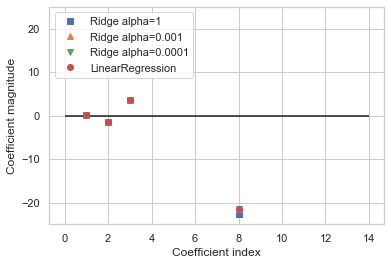

In [82]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge0001.coef_, '^', label="Ridge alpha=0.001")
plt.plot(ridge00001.coef_, 'v', label="Ridge alpha=0.0001")
plt.plot(lm.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lm.coef_))
plt.ylim(-25, 25)
plt.legend()

### Lasso Regression

In [83]:

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.84


In [84]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
# alpha = 1

lasso1 = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso1.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.84


In [85]:
# alpha = 0.001

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.84


In [86]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))


Training set score: 0.87
Test set score: 0.84


Text(0, 0.5, 'Coefficient magnitude')

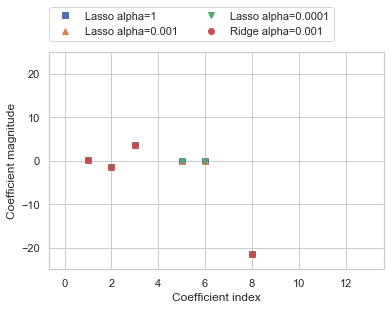

In [87]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso0001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge0001.coef_, 'o', label="Ridge alpha=0.001")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")